# Australian Surprise Housing 

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


#### The company wants to know:

-Which variables are significant in predicting the price of a house, and

-How well those variables describe the price of a house.

-Also, determine the optimal value of lambda for ridge and lasso regression.

### Importing Packages for regression model

In [267]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Read data from CSV

In [268]:
# Reading the dataset

ausDataSet= pd.read_csv('./data/train.csv')

### Find missing data

#### Finding the percentage of mising data in the columns

In [269]:
percent_missing = (ausDataSet.isnull().sum() / ausDataSet.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10) 

# Top 10 columns missing data

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64

#### Above aare top 10 columns with null data (Missing Data)

In [270]:
#Checking for outlier in the numerical columns
ausDataSet.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [271]:
#Checking the shape of the dataframe
ausDataSet.shape

(1460, 81)

#### Based on the dictionary we come to know that the null dose mean the column is not applicable.

Below catagorical variables are filled with None.

"Alley", "MasVnrType", "BsmtQual", "BsmtCond", 
"BsmtExposure", "BsmtFinType1", "BsmtFinType2", 
"FireplaceQu", "GarageType", "GarageFinish", 
"GarageQual", "GarageCond", "PoolQC", "Fence", 
"MiscFeature"

In [272]:

# This loops the variables name in the array and fillna will append NONE in the place of null.

null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    ausDataSet[i].fillna("NONE", inplace=True)

### Again finding the missing data.

In [273]:
percent_missing = (ausDataSet.isnull().sum() / ausDataSet.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10) 

# Top 10 columns missing data

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
Electrical       0.068493
KitchenAbvGr     0.000000
GarageType       0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
dtype: float64

#### This shows we have filled data in most of the catagorical variable.

In [274]:
#impute missing values of MasVnrArea
ausDataSet.MasVnrArea = ausDataSet.MasVnrArea.fillna(ausDataSet.MasVnrArea.median())  
#impute missing values of Electrical
ausDataSet.Electrical = ausDataSet.Electrical.fillna(ausDataSet.Electrical.mode()[0])  

In [275]:
ausDataSet['LotFrontage'] = ausDataSet.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
ausDataSet["GarageYrBlt"].fillna(ausDataSet["GarageYrBlt"].median(), inplace=True)


In [276]:
percent_missing = (ausDataSet.isnull().sum() / ausDataSet.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10) 

# Top 10 columns missing data

Id              0.0
CentralAir      0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
dtype: float64

### Finding numeric data in the dataframe

In [277]:
ausDataNumeric = ausDataSet.select_dtypes(include=['float64', 'int64'])
ausDataNumeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


# EDA on Numeric Data

# Visualising the sales price over few columns

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

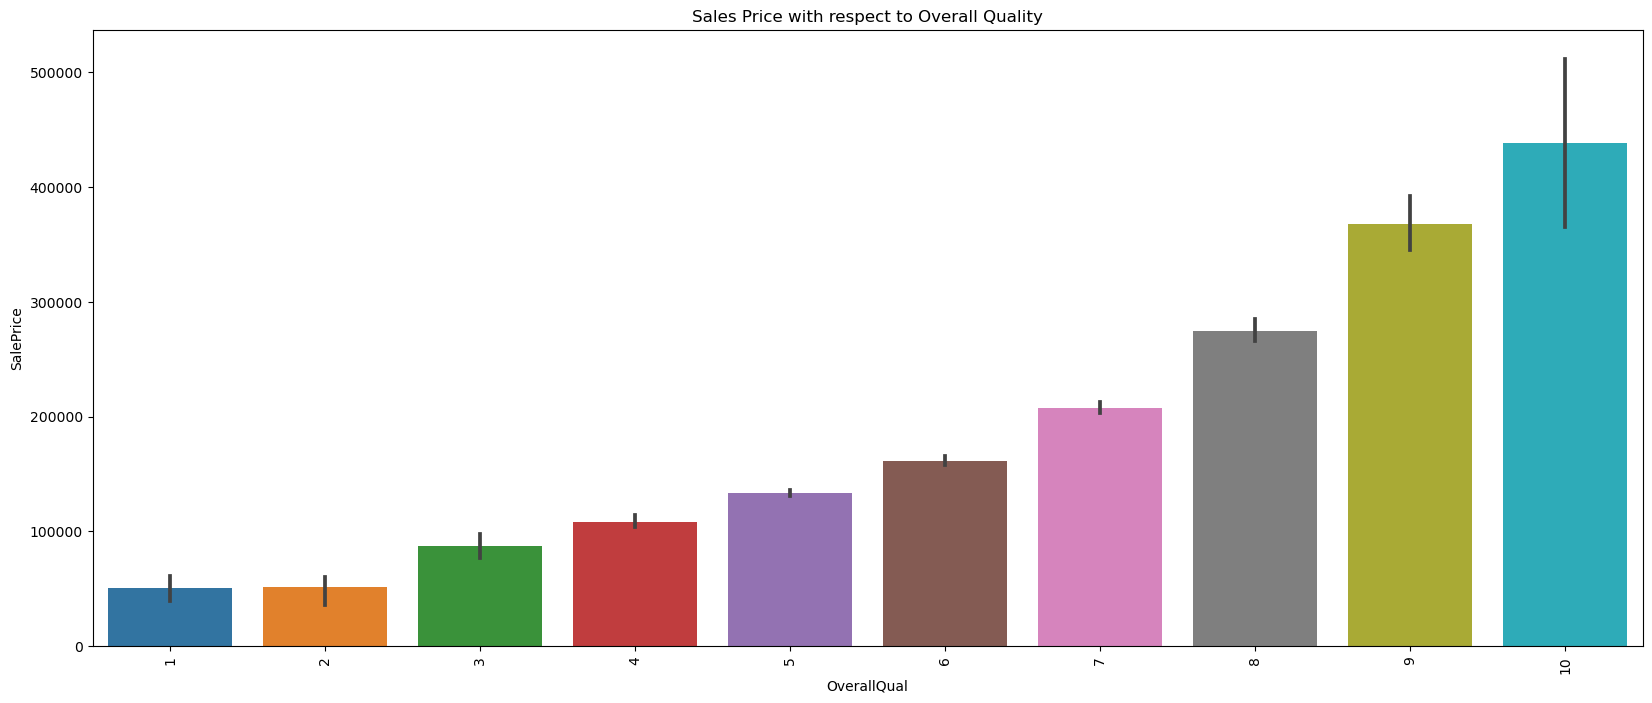

In [278]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= ausDataNumeric)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

### Feedback: Rise in OverallQual increases the price of the house.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

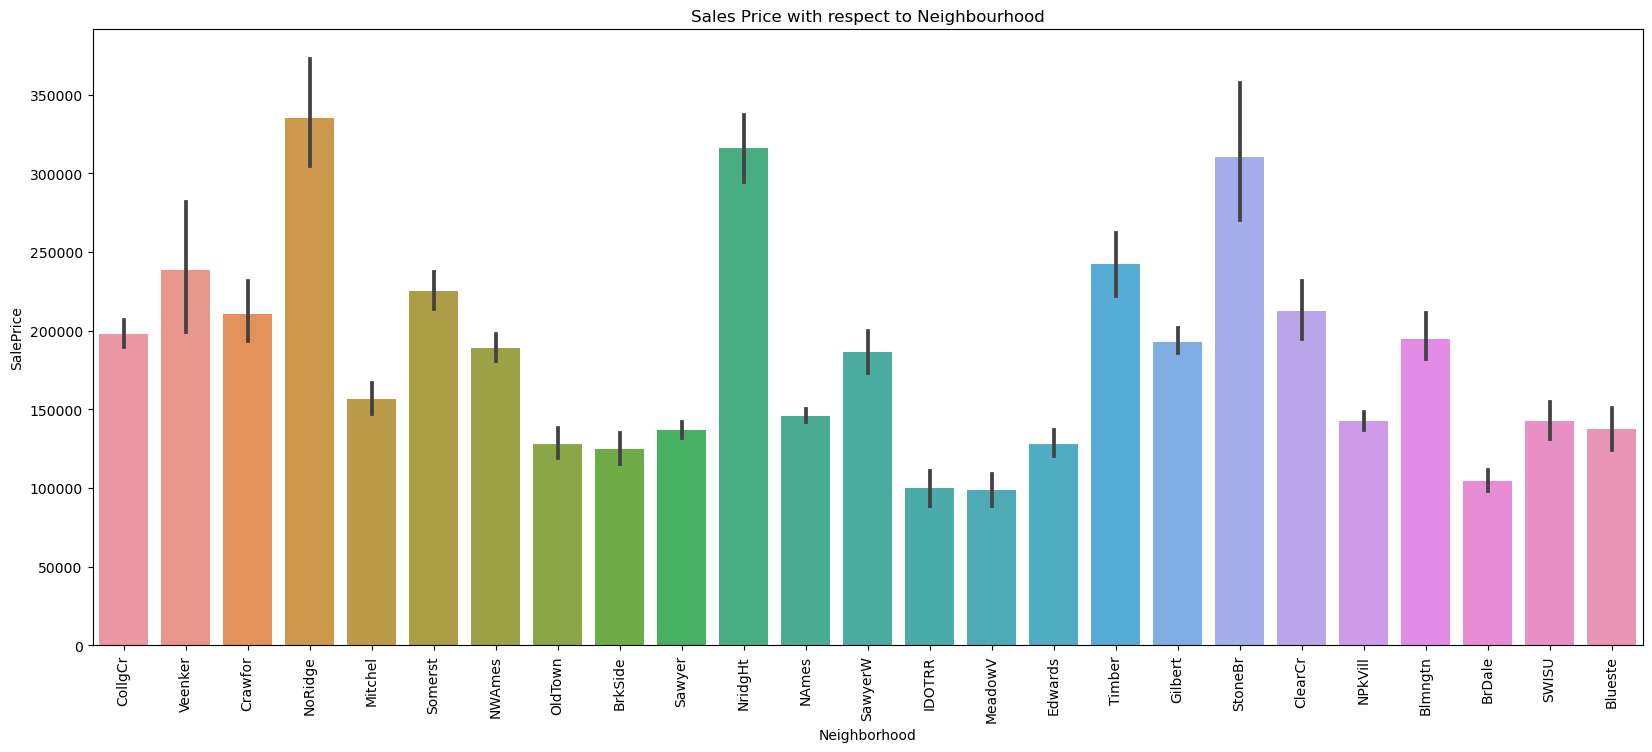

In [279]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= ausDataSet)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

#### Feedback: NoRidge, NridgHt, Timber, StoneBr are having houses with high price.

# Visualising the Sales Price

<Axes: xlabel='SalePrice', ylabel='Density'>

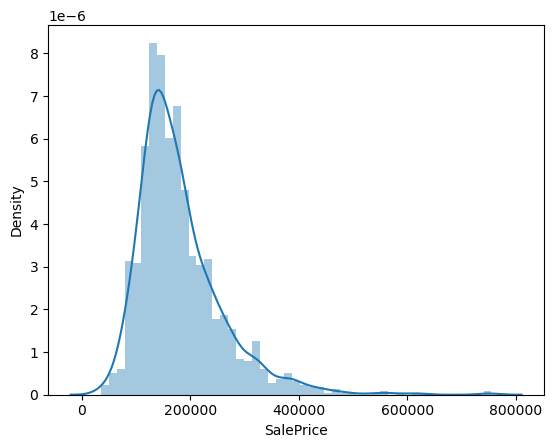

In [280]:
sns.distplot(ausDataSet['SalePrice'])

## The left skeweed stecture in the above figure shows that the "Sales Price" require log10 transformation.

<Axes: xlabel='SalePrice', ylabel='Density'>

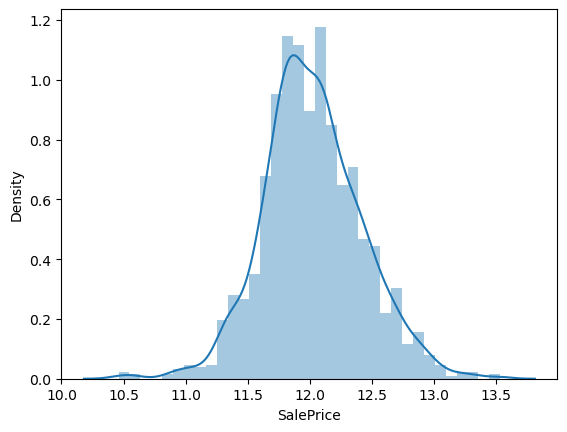

In [281]:
ausDataSet['SalePrice']=np.log1p(ausDataSet['SalePrice'])
sns.distplot(ausDataSet['SalePrice'])

### WOW We formed the Normal to full fill the condition for Linear Regression.

# Let's Find the corellation

In [282]:
cor = ausDataNumeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.003381,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.003381,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,...,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.349876
LotArea,-0.033226,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


### Let's plot heatmap and see the correlation 

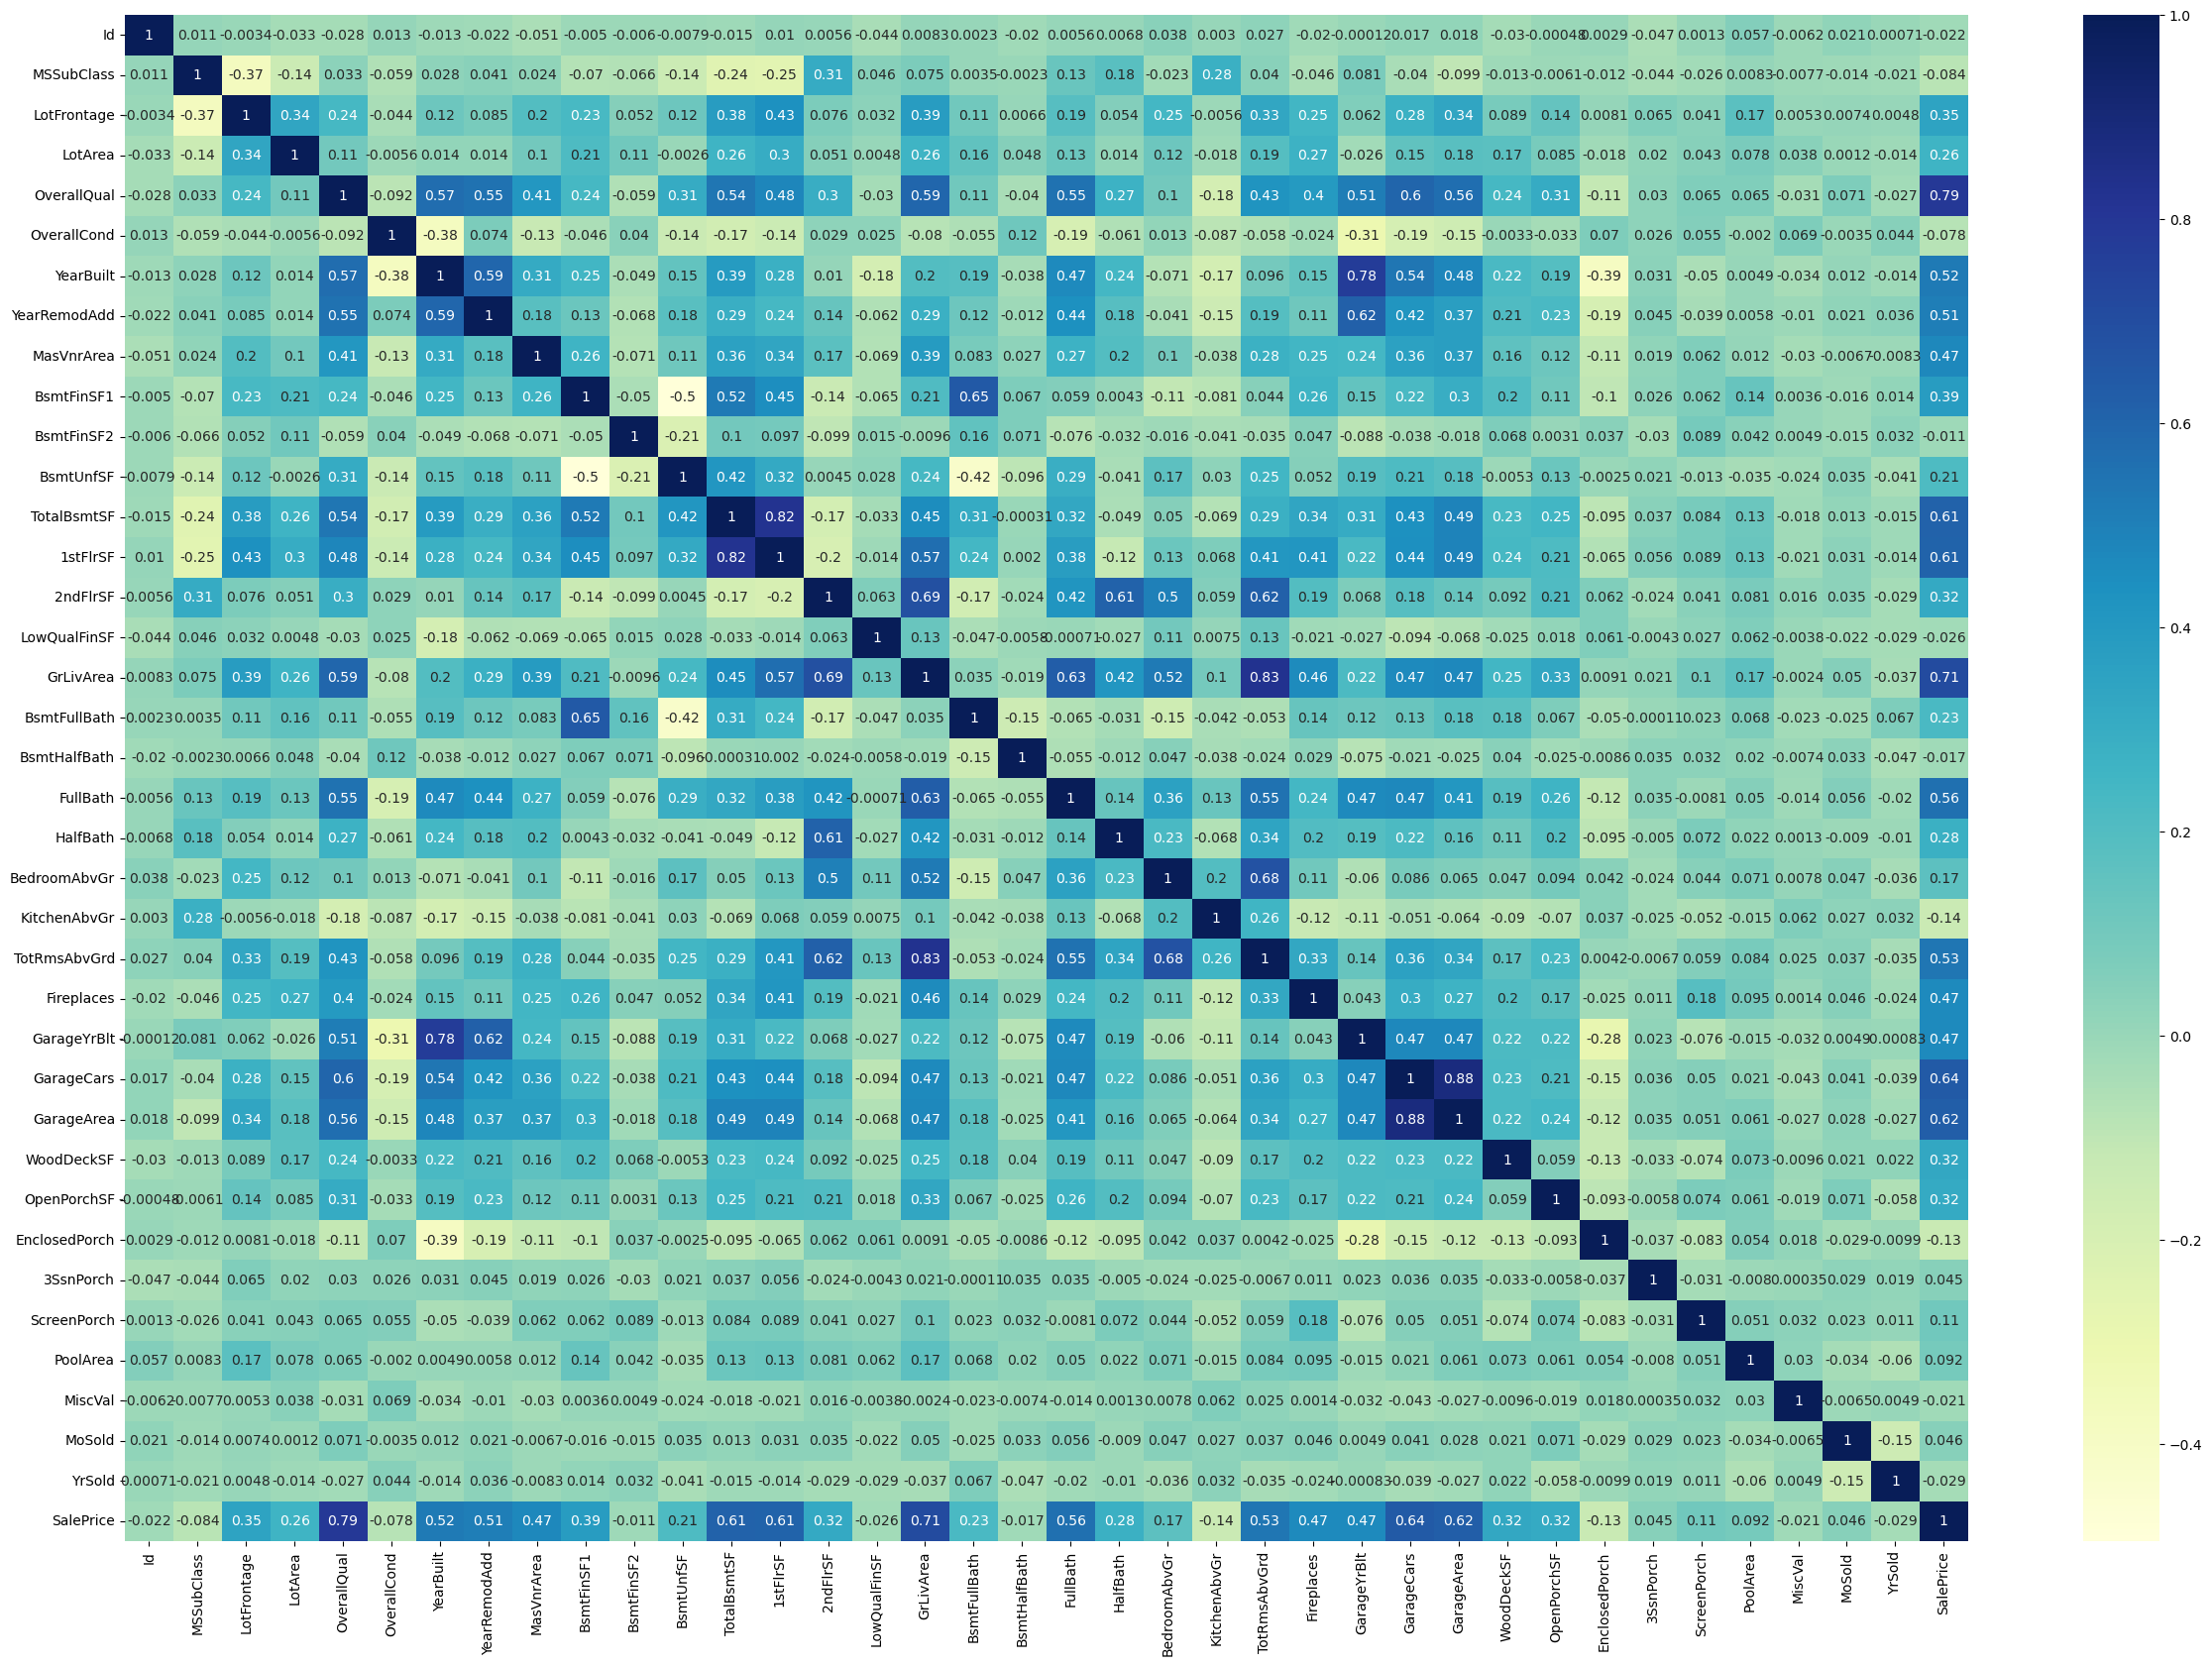

In [283]:
# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### OverallQual, Total Basement, Live Area, Garage area are highly corelated.

# Description of the dataset
ausDataSet.describe()

#### The way to remove outliers from the Housing dataframe

We are using the method (Function) to findout the variables in dataframe with outliers



In [284]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

# Data Preparation

Defining catagorical data set

#### Removing ID

In [285]:
ausDataSet=ausDataSet.drop(['Id'], axis=1)

In [286]:
#type of each feature in data: int, float, object
types = ausDataSet.dtypes
ausDataNumeric= types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [287]:
numericalColumns = list(ausDataNumeric.index)
categoricalColumns = list(categorical_type.index)
print(numericalColumns)
print(categoricalColumns)
trainData=ausDataSet

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual

Creating column age we know that age is main factor for price and we derive it from the year of build and current year.

In [288]:
trainData['age'] = (2023 - trainData['YearBuilt'])
trainData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age
0,60,RL,65.0,8450,Pave,NONE,Reg,Lvl,AllPub,Inside,...,NONE,NONE,NONE,0,2,2008,WD,Normal,12.247699,20
1,20,RL,80.0,9600,Pave,NONE,Reg,Lvl,AllPub,FR2,...,NONE,NONE,NONE,0,5,2007,WD,Normal,12.109016,47
2,60,RL,68.0,11250,Pave,NONE,IR1,Lvl,AllPub,Inside,...,NONE,NONE,NONE,0,9,2008,WD,Normal,12.317171,22
3,70,RL,60.0,9550,Pave,NONE,IR1,Lvl,AllPub,Corner,...,NONE,NONE,NONE,0,2,2006,WD,Abnorml,11.849405,108
4,60,RL,84.0,14260,Pave,NONE,IR1,Lvl,AllPub,FR2,...,NONE,NONE,NONE,0,12,2008,WD,Normal,12.429220,23


### Creating Dummies 

In [289]:
trainData = pd.get_dummies(trainData, drop_first=True )
trainData.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [290]:
X = trainData.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [291]:
# Putting response variable to y
y = trainData['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

# Splitting the data into train and test

In [292]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

### Rescalling

In [293]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'age']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'age']])


# Building Model

### Finding top 20 features

In [294]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 229),
 ('LotFrontage', False, 167),
 ('LotArea', False, 85),
 ('OverallQual', False, 46),
 ('OverallCond', False, 74),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 228),
 ('MasVnrArea', False, 206),
 ('BsmtFinSF1', False, 102),
 ('BsmtFinSF2', False, 213),
 ('BsmtUnfSF', False, 238),
 ('TotalBsmtSF', False, 70),
 ('1stFlrSF', False, 9),
 ('2ndFlrSF', False, 10),
 ('LowQualFinSF', False, 21),
 ('GrLivArea', False, 2),
 ('BsmtFullBath', False, 147),
 ('BsmtHalfBath', False, 222),
 ('FullBath', False, 176),
 ('HalfBath', False, 183),
 ('BedroomAbvGr', False, 232),
 ('KitchenAbvGr', False, 170),
 ('TotRmsAbvGrd', False, 202),
 ('Fireplaces', False, 231),
 ('GarageYrBlt', False, 233),
 ('GarageCars', False, 138),
 ('GarageArea', False, 110),
 ('WoodDeckSF', False, 189),
 ('OpenPorchSF', False, 198),
 ('EnclosedPorch', False, 192),
 ('3SsnPorch', False, 219),
 ('ScreenPorch', False, 174),
 ('PoolArea', False, 164),
 ('MiscVal', False, 237),
 ('MoSold', False, 230)

In [295]:
#selected columns from rfe
columns = X_train.columns[rfe.support_]
columns

Index(['YearBuilt', 'age', 'Condition2_RRAe', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'BsmtQual_NONE', 'BsmtFinType1_NONE',
       'BsmtFinType2_NONE', 'Functional_Sev', 'GarageType_NONE',
       'GarageFinish_NONE', 'GarageCond_NONE', 'PoolQC_Gd', 'PropAge'],
      dtype='object')

Skipping Columns which are not in REF

In [296]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=242)

# Ridge Regression

In [321]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [322]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026728,0.005657,0.012362,0.001171,0.0001,{'alpha': 0.0001},-0.088290,-0.087906,-0.091977,-0.111938,...,-0.094068,0.009053,26,-0.056636,-0.058192,-0.056068,-0.056243,-0.056342,-0.056696,0.000770
1,0.029585,0.003450,0.011254,0.005261,0.001,{'alpha': 0.001},-0.088290,-0.087561,-0.091156,-0.112088,...,-0.093841,0.009212,25,-0.056648,-0.058231,-0.056119,-0.056301,-0.056353,-0.056731,0.000769
2,0.025171,0.007159,0.014386,0.001777,0.01,{'alpha': 0.01},-0.088489,-0.085587,-0.089575,-0.111331,...,-0.092841,0.009351,24,-0.056849,-0.058434,-0.056295,-0.056492,-0.056477,-0.056909,0.000783
3,0.026729,0.004970,0.013610,0.003526,0.05,{'alpha': 0.05},-0.090031,-0.082882,-0.088401,-0.110117,...,-0.091876,0.009429,23,-0.057561,-0.059277,-0.056854,-0.056739,-0.057055,-0.057497,0.000933
4,0.030645,0.011425,0.009789,0.002742,0.1,{'alpha': 0.1},-0.091456,-0.081309,-0.088067,-0.109003,...,-0.091703,0.009271,14,-0.058293,-0.060314,-0.057843,-0.056920,-0.057792,-0.058232,0.001132


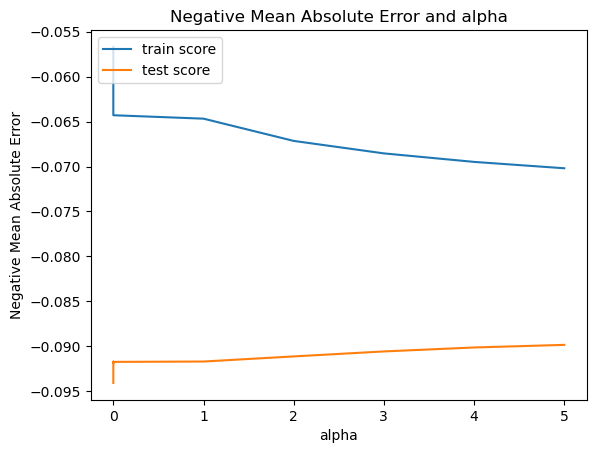

In [323]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [324]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.41769401e-02, -3.67725773e-03,  2.09483086e-02,  7.30634340e-02,
        4.56961777e-02,  8.36711872e-04,  1.11740029e-03,  5.25327765e-03,
       -1.46975139e-03,  7.24810282e-03, -8.86708399e-07,  1.10806704e-03,
        4.34785627e-02,  4.06682559e-02, -1.14482609e-03,  6.56189285e-02,
        2.44224423e-02,  7.95011269e-04,  2.64331344e-02,  1.20822233e-02,
        2.81443036e-03, -1.30713830e-02,  1.22878872e-02, -3.71495810e-03,
       -7.60424844e-04,  5.80954425e-02,  4.19778950e-03,  1.04250253e-02,
        6.99334870e-03,  1.17796700e-02,  6.10487093e-03,  1.27189298e-02,
       -6.25158657e-03, -1.43435728e-06, -7.04111856e-04, -3.48019754e-03,
       -8.36711871e-04,  1.36363447e-01,  1.43112793e-01,  1.17088503e-01,
        7.85245678e-02,  2.92952342e-02, -3.04535281e-02, -1.99567450e-02,
        1.43919382e-02, -6.61882678e-02,  2.18000610e-03,  2.01278460e-03,
       -1.14597906e-02,  1.04257442e-02, -6.55986826e-02,  3.19866857e-02,
       -4.10862408e-02, -

In [325]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 16.019),
 ('MSSubClass', -0.014),
 ('LotFrontage', -0.004),
 ('LotArea', 0.021),
 ('OverallQual', 0.073),
 ('OverallCond', 0.046),
 ('YearBuilt', 0.001),
 ('YearRemodAdd', 0.001),
 ('MasVnrArea', 0.005),
 ('BsmtFinSF1', -0.001),
 ('BsmtFinSF2', 0.007),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.001),
 ('1stFlrSF', 0.043),
 ('2ndFlrSF', 0.041),
 ('LowQualFinSF', -0.001),
 ('GrLivArea', 0.066),
 ('BsmtFullBath', 0.024),
 ('BsmtHalfBath', 0.001),
 ('FullBath', 0.026),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.003),
 ('KitchenAbvGr', -0.013),
 ('TotRmsAbvGrd', 0.012),
 ('Fireplaces', -0.004),
 ('GarageYrBlt', -0.001),
 ('GarageCars', 0.058),
 ('GarageArea', 0.004),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.007),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.013),
 ('PoolArea', -0.006),
 ('MiscVal', -0.0),
 ('MoSold', -0.001),
 ('YrSold', -0.003),
 ('age', -0.001),
 ('MSZoning_FV', 0.136),
 ('MSZoning_RH', 0.143),
 ('MSZoning_RL', 0.117),
 ('MSZoning_RM', 

In [326]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9381925163352889
0.8562068479594903


In [328]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.15068077723995765


In [309]:
alpha = 0.02
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-1.11450274e-02,  0.00000000e+00,  1.21210479e-02,  1.07346838e-01,
        2.57747284e-02,  3.23676378e-03,  2.89799033e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -4.12408024e-05,  3.21871409e-02,
        5.25717000e-03,  0.00000000e+00, -0.00000000e+00,  8.58162801e-02,
        6.80294847e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.25379070e-02,  3.08008247e-02,
       -5.80282848e-04,  1.04106405e-02,  3.19208594e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.55477930e-03,
       -3.85142649e-03, -5.22355520e-06,  0.00000000e+00, -0.00000000e+00,
       -2.48521942e-05,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [310]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.895),
 ('MSSubClass', -0.011),
 ('LotFrontage', 0.0),
 ('LotArea', 0.012),
 ('OverallQual', 0.107),
 ('OverallCond', 0.026),
 ('YearBuilt', 0.003),
 ('YearRemodAdd', 0.003),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.032),
 ('1stFlrSF', 0.005),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.086),
 ('BsmtFullBath', 0.007),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.023),
 ('Fireplaces', 0.031),
 ('GarageYrBlt', -0.001),
 ('GarageCars', 0.01),
 ('GarageArea', 0.032),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.002),
 ('PoolArea', -0.004),
 ('MiscVal', -0.0),
 ('MoSold', 0.0),
 ('YrSold', -0.0),
 ('age', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', -0.0),
 ('Alley_NONE',

# lasso regression

In [329]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [330]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.445408,0.058447,0.016725,0.001375,0.0001,{'alpha': 0.0001},-0.083307,-0.073956,-0.083960,-0.102620,...,-0.085117,0.009454,1,-0.060074,-0.062122,-0.059593,-0.059392,-0.059124,-0.060061,0.001076
1,0.285288,0.029656,0.015307,0.003885,0.001,{'alpha': 0.001},-0.085836,-0.078035,-0.087620,-0.100977,...,-0.086769,0.007859,2,-0.075835,-0.079036,-0.075664,-0.071911,-0.075299,-0.075549,0.002261
2,0.047732,0.002479,0.012255,0.002842,0.01,{'alpha': 0.01},-0.109295,-0.097858,-0.098351,-0.109221,...,-0.101411,0.006747,3,-0.098493,-0.101520,-0.098548,-0.088112,-0.099670,-0.097269,0.004708
3,0.029187,0.003906,0.010178,0.004230,0.05,{'alpha': 0.05},-0.140839,-0.128790,-0.126249,-0.135958,...,-0.129766,0.008215,4,-0.129478,-0.131997,-0.129123,-0.116781,-0.129836,-0.127443,0.005424
4,0.030694,0.003667,0.010788,0.005033,0.1,{'alpha': 0.1},-0.186646,-0.174538,-0.164370,-0.175939,...,-0.171348,0.010707,5,-0.170122,-0.171596,-0.168791,-0.163103,-0.171729,-0.169068,0.003170


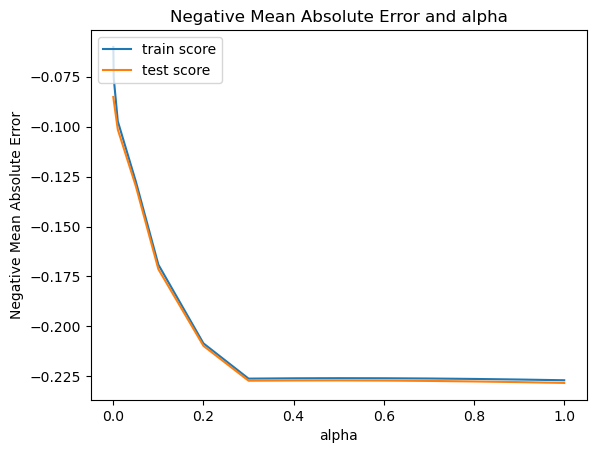

In [331]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

# Trade off the Bias condition will choose the low aplha as 0.02

In [332]:

lm = Lasso(alpha=0.02)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8469035341203828
0.8372587884120614


In [333]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.16030147639021608


In [334]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,16.019
1,MSSubClass,-0.014
2,LotFrontage,-0.004
3,LotArea,0.021
4,OverallQual,0.073


In [335]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para.head(20)

,Variable,Coeff
0,constant,16.019
39,MSZoning_RH,0.143
38,MSZoning_FV,0.136
113,RoofMatl_CompShg,0.135
119,RoofMatl_WdShngl,0.122
40,MSZoning_RL,0.117
63,Neighborhood_Crawfor,0.101
79,Neighborhood_StoneBr,0.100
255,SaleType_Oth,0.095
114,RoofMatl_Membran,0.094


In [336]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred.head(20)

,Variable,Coeff
0,constant,16.019
39,MSZoning_RH,0.143
38,MSZoning_FV,0.136
113,RoofMatl_CompShg,0.135
119,RoofMatl_WdShngl,0.122
40,MSZoning_RL,0.117
63,Neighborhood_Crawfor,0.101
79,Neighborhood_StoneBr,0.100
255,SaleType_Oth,0.095
114,RoofMatl_Membran,0.094


In [337]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.16030147639021608


In [338]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

,Variable,Coeff
0,constant,16.019
1,MSSubClass,-0.014
2,LotFrontage,-0.004
3,LotArea,0.021
4,OverallQual,0.073


In [339]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

,Variable,Coeff
0,constant,16.019
39,MSZoning_RH,0.143
38,MSZoning_FV,0.136
113,RoofMatl_CompShg,0.135
119,RoofMatl_WdShngl,0.122
...,...,...
191,Heating_Grav,-0.087
121,Exterior1st_BrkComm,-0.088
67,Neighborhood_MeadowV,-0.122
206,Functional_Maj2,-0.184


In [340]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,16.019
39,MSZoning_RH,0.143
38,MSZoning_FV,0.136
113,RoofMatl_CompShg,0.135
119,RoofMatl_WdShngl,0.122
...,...,...
191,Heating_Grav,-0.087
121,Exterior1st_BrkComm,-0.088
67,Neighborhood_MeadowV,-0.122
206,Functional_Maj2,-0.184


### Inferance 

From all the above we can see The higher values of positive coeeficients suggest a high sale value

Ridge Regression was better in terms of R2 values of Train and Test,it is better to use Lasso


Selected  Feature	and  Description
- GrLivArea	Above grade (ground) living area square feet
- OverallQual	Rates the overall material and finish of the house
- OverallCond	Rates the overall condition of the house
- TotalBsmtSF	Total square feet of basement area
- GarageArea	Size of garage in square feet

Age and MSSubClass are deciding the reduced value in sale price